# TF-IDF Vectorizer scikit-learn
Calculate **TfidfVectorizer** by using **CountVectorizer** and **TfidfTransformer** in **sklearn** module in python
(Source: https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a)

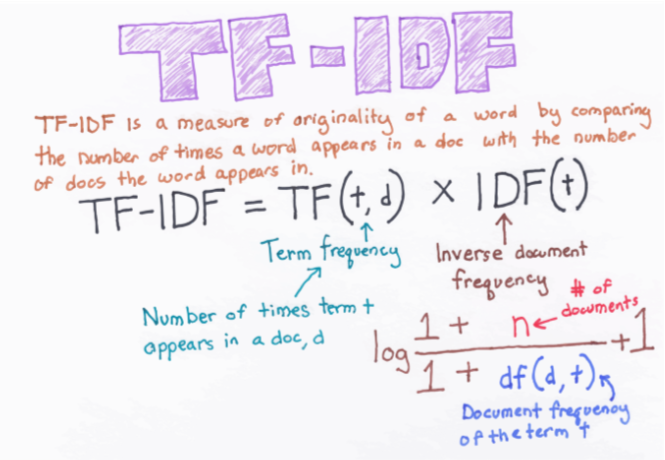

Example:

Train Document Set:

d1: The sky is blue.

d2: The sun is bright.

Test Document Set:

d3: The sun in the sky is bright.

d4: We can see the shining sun, the bright sun.

We are creating index vocabulary(dictionary) of the words of the train documents set, using the documents d1 and d2 from document set ('the', 'is' is ignored)

In [2]:
#import count vectorize and tfidf vectorise
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
train = ('The sky is blue.','The sun is bright.')
test = ('The sun in the sky is bright', 'We can see the shining sun, the bright sun.')
# instantiate the vectorizer object
# use analyzer is word and stop_words is english which are responsible for remove stop words and create word vocabulary
countvectorizer = CountVectorizer(analyzer='word' , stop_words='english')
terms = countvectorizer.fit_transform(train)
term_vectors  = countvectorizer.transform(test)
print("Sparse Matrix form of test data : \n")
print(term_vectors.todense())

Sparse Matrix form of test data : 

[[0 1 1 1]
 [0 1 0 2]]


We represent d3 and d4 of test document set as vectors:
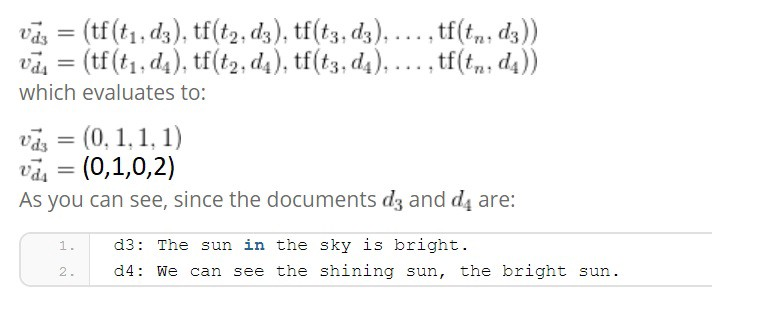

In [3]:
# Tranfer  sparse matrix of Countvectorizer to tf-idf by 
# using TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer(norm='l2')
term_vectors.todense()

matrix([[0, 1, 1, 1],
        [0, 1, 0, 2]])

In [4]:
tfidf.fit(term_vectors)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

The term frequency — inverse document frequency(tf-idf) weight

We saw above how to calculate term frequency . Now let’s come to idf(inverse document frequency) topic that how it is calculate and multiplication with tf (term frequency) . The idf is defined:
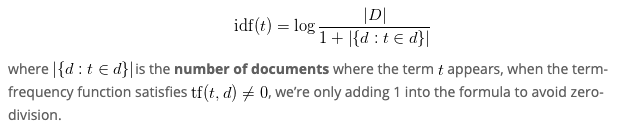

In [5]:
#We have calculated matrix of test data above and have 4 features like “ blue,bright,sky,sum” ,
#we have to calculated idf(t) :
tf_idf_matrix = tfidf.transform(term_vectors)
print("\nVector of idf \n")
print(tfidf.idf_)


Vector of idf 

[2.09861229 1.         1.40546511 1.        ]


After that we calculated tf-idf (t) by multiplication of tf(t,d) * idf(t) like:
matrix [[0 ,1,1,1],[0, 1,0,2]] * matrix form idf

In [6]:
print("\nFinal tf-idf vectorizer matrix form :\n")
print(tf_idf_matrix.todense())


Final tf-idf vectorizer matrix form :

[[0.         0.50154891 0.70490949 0.50154891]
 [0.         0.4472136  0.         0.89442719]]


# TfidfVectorizer 
we can get both functionality like **CountVectorizer** , **TfidfTransformer** in **TfidfVectorizer** . We can customize all parameters which have the above both classes. Let’s see by python code

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
train = ('The sky is blue.','The sun is bright.')
test = ('The sun in the sky is bright', 'We can see the shining sun, the bright sun.')
# instantiate the vectorizer object
# use analyzer is word and stop_words is english which are responsible for remove stop words and create word vocabulary
tfidfvectorizer = TfidfVectorizer(analyzer='word' , stop_words='english',)
tfidfvectorizer.fit(train)
tfidf_train = tfidfvectorizer.transform(train)

In [8]:
tfidf_train.todense()

matrix([[0.70710678, 0.        , 0.70710678, 0.        ],
        [0.        , 0.70710678, 0.        , 0.70710678]])

In [9]:
tfidf_term_vectors  = tfidfvectorizer.transform(test)

In [10]:
print("Sparse Matrix form of test data : \n")
tfidf_term_vectors.todense()

Sparse Matrix form of test data : 



matrix([[0.        , 0.57735027, 0.57735027, 0.57735027],
        [0.        , 0.4472136 , 0.        , 0.89442719]])

In [11]:
# TfidfVectorizer 
# CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
# set of documents
train = ['The sky is blue.','The sun is bright.']
# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
# convert th documents into a matrix
count_wm = countvectorizer.fit_transform(train)
tfidf_wm = tfidfvectorizer.fit_transform(train)
#retrieve the terms found in the corpora
# if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer) , it will give same output of get_feature_names() methods)
#count_tokens = tfidfvectorizer.get_feature_names() # no difference
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_countvect = pd.DataFrame(data = count_wm.toarray(),index = ['Doc1','Doc2'],columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['Doc1','Doc2'],columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

      blue  bright  sky  sun
Doc1     1       0    1    0
Doc2     0       1    0    1

TD-IDF Vectorizer

          blue    bright       sky       sun
Doc1  0.707107  0.000000  0.707107  0.000000
Doc2  0.000000  0.707107  0.000000  0.707107
